### 1. Collecting the Data

In [1]:
import pandas as pd 

df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


### 2. Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

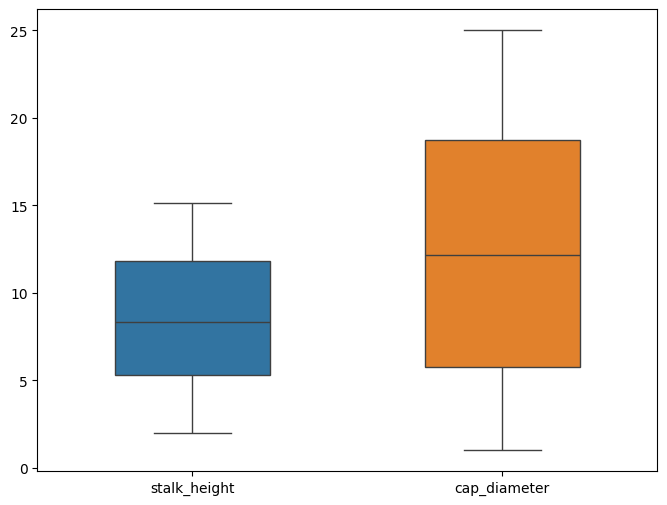

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.boxplot(data=df[['stalk_height', 'cap_diameter']], width=0.5)
plt.show()


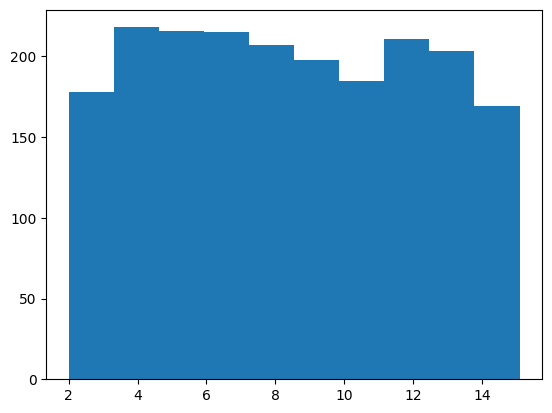

In [4]:
plt.hist(df['stalk_height'])
plt.show()

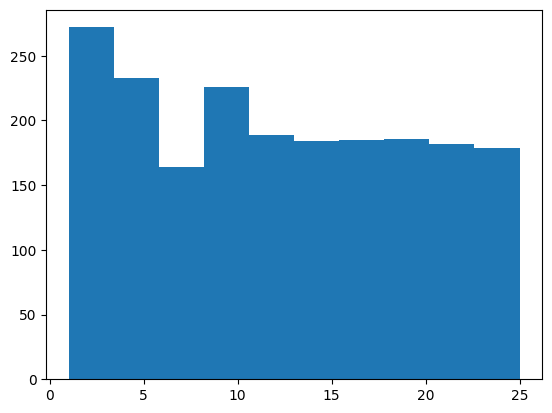

In [5]:
plt.hist(df['cap_diameter'])
plt.show()

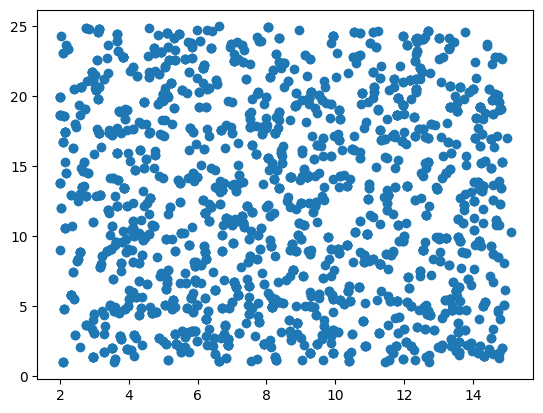

In [6]:
# As there are only two numerical variables, we can plot the scatter plot only for those two variables
plt.scatter(df['stalk_height'], df['cap_diameter'])
plt.show()

In [7]:
df[['stalk_height', 'cap_diameter']].corr()

,stalk_height,cap_diameter
stalk_height,1.000000,-0.003486
cap_diameter,-0.003486,1.000000


In [8]:
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous


In [9]:
df_num = df.iloc[:, [24, 25]]
df_num.head()

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245


### 3. Data Transformation

In [10]:
# Standardization

from sklearn.preprocessing import StandardScaler # type: ignore

ss = StandardScaler()
df_num = ss.fit_transform(df_num)
df_num = pd.DataFrame(df_num)
df_num.columns = ['stalk_height', 'cap_diameter']
df_num.head()

,stalk_height,cap_diameter
0,1.576459,-1.030123
1,-1.216463,0.958407
2,0.163717,-0.724904
3,-0.871852,1.222967
4,1.511897,0.032765


In [11]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder # type: ignore
le = LabelEncoder()

for i in df_cat.columns:
    df_cat[i] = le.fit_transform(df_cat[i])

df_cat = pd.DataFrame(df_cat)
df_cat.columns = list(df_cat)
df_cat.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,1


In [12]:
Y = df_cat[['class']]
Y.shape

(2000, 1)

In [13]:
X = pd.concat([df_num, df_cat.drop(df[['class']], axis=1)], axis = 1)
X.shape

(2000, 24)

### 4. Data Partition

In [14]:
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### 5. Model fitting

In [15]:
from sklearn.svm import SVC # type: ignore
# model = SVC(kernel='linear') # 70, 70
# model = SVC(kernel='poly', degree=2) # 70, 70
# model = SVC(kernel='poly', degree=3) # 80, 73
# model = SVC(kernel='rbf', gamma=10) # 100, 87
model = SVC(kernel='rbf', gamma=15) # 100, 87

model.fit(X_train, Y_train)

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=15)

In [16]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [17]:
# Metrics

from sklearn.metrics import accuracy_score # type: ignore
ac1 = accuracy_score(Y_train, Y_pred_train)
print('Training accuracy error:', ac1)
ac2 = accuracy_score(Y_test, Y_pred_test)
print('Testing accuracy error:', ac2)

Training accuracy error: 1.0
Testing accuracy error: 0.8816666666666667


### 6. Data Validation

In [18]:
# Cross Validation

training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np # type: ignore
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was 

Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 0.87


In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, Y_pred_train)
cm

array([[419,   0],
       [  0, 981]], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred_test)
cm

array([[ 95,  86],
       [  0, 419]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report # type: ignore

report = classification_report(Y_train, Y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       419
           1       1.00      1.00      1.00       981

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [22]:
from sklearn.metrics import classification_report # type: ignore

report = classification_report(Y_test, Y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.52      0.69       181
           1       0.83      1.00      0.91       419

    accuracy                           0.86       600
   macro avg       0.91      0.76      0.80       600
weighted avg       0.88      0.86      0.84       600



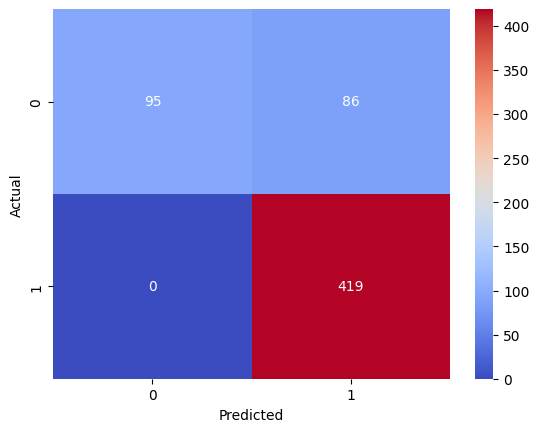

In [23]:
# Here Y_test and Y_pred_test as your actual and predicted labels

cm = confusion_matrix(Y_test, Y_pred_test)
sns.heatmap(cm, annot=True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:

from sklearn.calibration import CalibratedClassifierCV # type: ignore

calibrated_clf = CalibratedClassifierCV(model, cv=5, method='sigmoid')
calibrated_clf.fit(X_train, Y_train)

# Get probability estimates
y_pred_proba = calibrated_clf.predict_proba(X_test)

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y wa

In [32]:
y_pred_proba

array([[0.22416755, 0.77583245],
       [0.23856533, 0.76143467],
       [0.23848228, 0.76151772],
       [0.27317456, 0.72682544],
       [0.36796171, 0.63203829],
       [0.2388555 , 0.7611445 ],
       [0.25694814, 0.74305186],
       [0.4234499 , 0.5765501 ],
       [0.46354483, 0.53645517],
       [0.18960754, 0.81039246],
       [0.22002355, 0.77997645],
       [0.23886784, 0.76113216],
       [0.26122424, 0.73877576],
       [0.23763624, 0.76236376],
       [0.23882161, 0.76117839],
       [0.18800622, 0.81199378],
       [0.28658839, 0.71341161],
       [0.31486249, 0.68513751],
       [0.24183698, 0.75816302],
       [0.19938766, 0.80061234],
       [0.30629574, 0.69370426],
       [0.27254944, 0.72745056],
       [0.23695906, 0.76304094],
       [0.30801288, 0.69198712],
       [0.23724176, 0.76275824],
       [0.2684569 , 0.7315431 ],
       [0.2438199 , 0.7561801 ],
       [0.28774582, 0.71225418],
       [0.22822928, 0.77177072],
       [0.68800149, 0.31199851],
       [0.

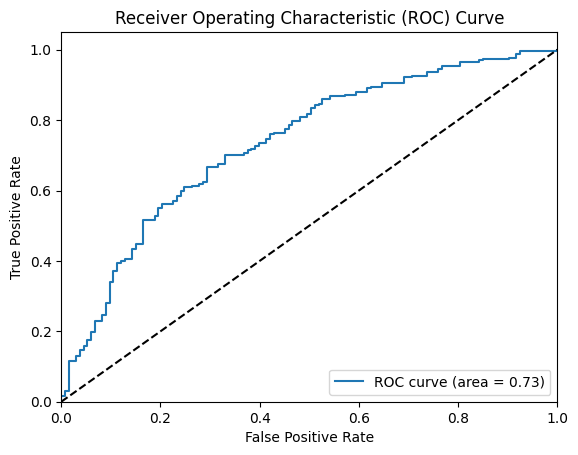

AUC score 0.734


In [40]:
from sklearn.metrics import roc_curve, roc_auc_score, auc # type: ignore

# Assuming you have y_true and y_pred_proba as your true labels and predicted probabilities

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba[:, 1]) # type: ignore
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print('AUC score', round(roc_auc_score(Y_test, y_pred_proba[:, 1]), 3)) # type: ignore

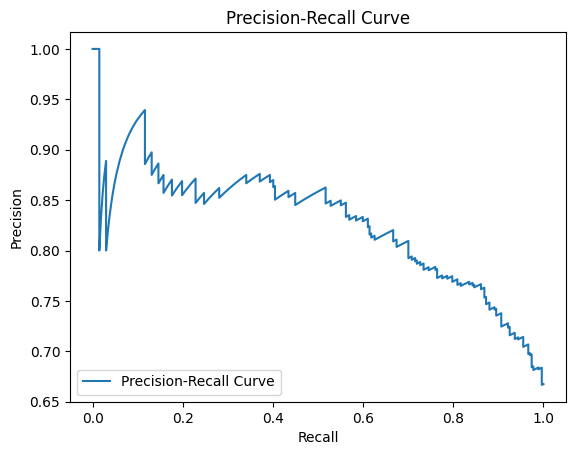

In [41]:
from sklearn.metrics import precision_recall_curve # type: ignore

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_proba[:, 1])

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [27]:
df_num.values

array([[ 1.57645935, -1.03012304],
       [-1.21646308,  0.95840718],
       [ 0.16371736, -0.72490441],
       ...,
       [ 1.38218107, -0.14819255],
       [ 0.71519905, -0.55216407],
       [ 1.24916951,  1.24055562]])

In [28]:
X.shape

(2000, 24)

In [29]:
from sklearn.model_selection import train_test_split  # type: ignore
X_train, X_test, Y_train, Y_test = train_test_split(df_num, Y, test_size = 0.2, random_state = 42)

from sklearn.svm import SVC # type: ignore
# model = SVC(kernel='linear') # 70, 70
# model = SVC(kernel='poly', degree=2) # 70, 70
# model = SVC(kernel='poly', degree=3) # 80, 73
# model = SVC(kernel='rbf', gamma=10) # 100, 87
model = SVC(kernel='rbf', gamma=20) # 100, 87

model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

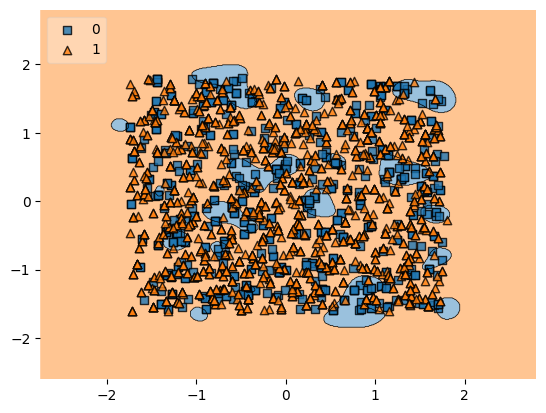

In [30]:
from mlxtend.plotting import plot_decision_regions  # type: ignore
plot_decision_regions(X=df_num.values, 
                      y=Y.values.ravel(),
                      clf=model, 
                      legend=2)

Comparison of performance with various kernels:

1. Kernel: 'linear' - training_accuracy: 70% and test_accuracy: 70%
2. Kernel: 'poly' & degree = '2' - training_accuracy: 70% and test_accuracy: 70%
3. Kernel: 'poly' & degree = '3' - training_accuracy: 80% and test_accuracy: 73%
4. Kernel: 'rbf' & gamma = '10' - training_accuracy: 100% and test_accuracy: 87%
5. Kernel: 'rbf' & gamma = '15' - training_accuracy: 100% and test_accuracy: 87%

Therefore, accuracies are higher with the 'rbf' kernel with the values of train_acc = 100% and test_acc = 87%.